#**COSINUS SIMILARITY**


In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv

# Tulis header ke file CSV
with open('politik.csv', 'w', newline='') as file:
    wr = csv.writer(file, delimiter=',')
    # Definisikan header sesuai dengan nama kolom yang Anda inginkan
    header = ['Headline', 'Link', 'Content']
    wr.writerow(header)

def scrape_detik(hal):
    global hades
    a = 1
    for page in range(1,hal):
        url = f'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page={page}'
        ge = req.get(url,hades).text
        sop = bs(ge,'lxml')
        li = sop.find('div',class_='list media_rows list-berita')
        lin = li.find_all('article')
        for x in lin:
            link = x.find('a')['href']
           # date = x.find('a').find('span',class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
            headline = x.find('a').find('h2').text
            ge_ = req.get(link,hades).text
            sop_ = bs(ge_,'lxml')
            content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
            for x in content:
                x = x.find_all('p')
                y  = [y.text for y in x ]
                content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
                print(f'done[{a}] > {headline[0:10]}')
                a += 1
                with open('politik.csv','a')as file:
                    wr = csv.writer(file, delimiter=',')
                    wr.writerow([headline,link,content_])

In [ ]:
scrape_detik(3)

done[1] > Relawan KI
done[2] > Isu Kartu 
done[3] > Kapan Peng
done[4] > Partai Gar
done[5] > Heboh Ketu
done[6] > Densus 88 
done[7] > Balasan Go
done[8] > Legislator
done[9] > 4 Nama Men
done[10] > Pesan Legi
done[11] > Tanda Tany
done[12] > Harun Masi
done[13] > Golkar Opt
done[14] > Ajaib Ajak
done[15] > Namanya Sa
done[16] > PAN Yakin 


In [ ]:
import pandas as pd
df = pd.read_csv('/content/politik.csv')
df

,Headline,Link,Content
0,Relawan KIP Ponorogo Deklarasi Dukungan Prabow...,https://news.detik.com/pemilu/d-7015137/relawa...,Relawan Komite Independen Pemenangan (KIP) Pra...
1,"Isu Kartu Truf, PPP Heran Nusron Ungkit Ganti ...",https://news.detik.com/pemilu/d-7015112/isu-ka...,Juru bicara PPP Achmad Baidowi (Awiek) merespo...
2,Kapan Pengumuman TKN Prabowo-Gibran? Ini Jawab...,https://news.detik.com/berita/d-7015092/kapan-...,Ketua Harian DPP Partai Gerindra Dasco mengata...
3,"Partai Garuda: Kasihan Jokowi, Bersikap Netral...",https://news.detik.com/pemilu/d-7014992/partai...,Partai Garuda menyebut banyak fitnah yang ditu...
4,Heboh Ketua DPAC PKB Dipecat karena Dukung-Pas...,https://www.detik.com/bali/berita/d-7014904/he...,Ambar Purwoko dipecat dari jabatan Ketua Dewan...
5,Densus 88 Sebut Tindak Pidana Terorisme Turun ...,https://news.detik.com/berita/d-7014872/densus...,Densus 88 Antiteror Polri mengatakan tindak pi...
6,Balasan Golkar soal Gibran Usai PDIP Singgung ...,https://news.detik.com/pemilu/d-7014852/balasa...,PDIP bicara 'penzaliman' jika pihaknya memecat...
7,Legislator Golkar Yakin dengan Kemampuan Calon...,https://news.detik.com/pemilu/d-7014821/legisl...,Presiden Joko Widodo (Jokowi) memilih KSAD Jen...
8,4 Nama Mencuat Jadi Ketua Tim Prabowo-Gibran d...,https://www.detik.com/sulsel/berita/d-7014816/...,Sejumlah nama mulai mencuat untuk menjadi calo...
9,Pesan Legislator Demokrat ke Calon Panglima TN...,https://news.detik.com/pemilu/d-7014798/pesan-...,Anggota Komisi I DPR RI dari Fraksi Partai Dem...


In [ ]:
df = df.dropna()
df.isnull().sum()

Headline    0
Link        0
Content     0
dtype: int64

In [ ]:
!pip install Sastrawi

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
df = pd.read_csv('/content/politik.csv')
df

,Headline,Link,Content
0,Relawan KIP Ponorogo Deklarasi Dukungan Prabow...,https://news.detik.com/pemilu/d-7015137/relawa...,Relawan Komite Independen Pemenangan (KIP) Pra...
1,"Isu Kartu Truf, PPP Heran Nusron Ungkit Ganti ...",https://news.detik.com/pemilu/d-7015112/isu-ka...,Juru bicara PPP Achmad Baidowi (Awiek) merespo...
2,Kapan Pengumuman TKN Prabowo-Gibran? Ini Jawab...,https://news.detik.com/berita/d-7015092/kapan-...,Ketua Harian DPP Partai Gerindra Dasco mengata...
3,"Partai Garuda: Kasihan Jokowi, Bersikap Netral...",https://news.detik.com/pemilu/d-7014992/partai...,Partai Garuda menyebut banyak fitnah yang ditu...
4,Heboh Ketua DPAC PKB Dipecat karena Dukung-Pas...,https://www.detik.com/bali/berita/d-7014904/he...,Ambar Purwoko dipecat dari jabatan Ketua Dewan...
5,Densus 88 Sebut Tindak Pidana Terorisme Turun ...,https://news.detik.com/berita/d-7014872/densus...,Densus 88 Antiteror Polri mengatakan tindak pi...
6,Balasan Golkar soal Gibran Usai PDIP Singgung ...,https://news.detik.com/pemilu/d-7014852/balasa...,PDIP bicara 'penzaliman' jika pihaknya memecat...
7,Legislator Golkar Yakin dengan Kemampuan Calon...,https://news.detik.com/pemilu/d-7014821/legisl...,Presiden Joko Widodo (Jokowi) memilih KSAD Jen...
8,4 Nama Mencuat Jadi Ketua Tim Prabowo-Gibran d...,https://www.detik.com/sulsel/berita/d-7014816/...,Sejumlah nama mulai mencuat untuk menjadi calo...
9,Pesan Legislator Demokrat ke Calon Panglima TN...,https://news.detik.com/pemilu/d-7014798/pesan-...,Anggota Komisi I DPR RI dari Fraksi Partai Dem...


In [ ]:
# CLEANING
# Menghapus simbol, tanda baca, karakter tertentu

def cleaning(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text).strip()
  return text

df['Cleaning'] = df['Content'].apply(cleaning)
df['Cleaning']

0     Relawan Komite Independen Pemenangan KIP Prabo...
1     Juru bicara PPP Achmad Baidowi Awiek merespons...
2     Ketua Harian DPP Partai Gerindra Dasco mengata...
3     Partai Garuda menyebut banyak fitnah yang ditu...
4     Ambar Purwoko dipecat dari jabatan Ketua Dewan...
5     Densus  Antiteror Polri mengatakan tindak pida...
6     PDIP bicara penzaliman jika pihaknya memecat G...
7     Presiden Joko Widodo Jokowi memilih KSAD Jende...
8     Sejumlah nama mulai mencuat untuk menjadi calo...
9     Anggota Komisi I DPR RI dari Fraksi Partai Dem...
10    Ketua Tim Kampanye Nasional TKN Prabowo Subian...
11    Pusat Kajian Anti Korupsi Pukat UGM menyoroti ...
12    Ketua Bappilu Partai Golkar Maman Abdurahman m...
13    Ajaib mengajak para retail memanfaatkan peluan...
14    Gubernur Jatim Khofifah Indar Parawansa buka s...
15    Anggota Komisi I DPR RI Fraksi PAN Ahmad Rizki...
Name: Cleaning, dtype: object

In [ ]:
from nltk.tokenize import sent_tokenize
# Fungsi untuk mengekstrak artikel menjadi kalimat
def extract_sentences(article):
    sentences = sent_tokenize(article)
    return sentences

# Menerapkan fungsi extract_sentences ke setiap baris dalam kolom 'artikel'
df['Kalimat'] = df['Cleaning'].apply(extract_sentences)
df['Kalimat']

0     [Relawan Komite Independen Pemenangan KIP Prab...
1     [Juru bicara PPP Achmad Baidowi Awiek merespon...
2     [Ketua Harian DPP Partai Gerindra Dasco mengat...
3     [Partai Garuda menyebut banyak fitnah yang dit...
4     [Ambar Purwoko dipecat dari jabatan Ketua Dewa...
5     [Densus  Antiteror Polri mengatakan tindak pid...
6     [PDIP bicara penzaliman jika pihaknya memecat ...
7     [Presiden Joko Widodo Jokowi memilih KSAD Jend...
8     [Sejumlah nama mulai mencuat untuk menjadi cal...
9     [Anggota Komisi I DPR RI dari Fraksi Partai De...
10    [Ketua Tim Kampanye Nasional TKN Prabowo Subia...
11    [Pusat Kajian Anti Korupsi Pukat UGM menyoroti...
12    [Ketua Bappilu Partai Golkar Maman Abdurahman ...
13    [Ajaib mengajak para retail memanfaatkan pelua...
14    [Gubernur Jatim Khofifah Indar Parawansa buka ...
15    [Anggota Komisi I DPR RI Fraksi PAN Ahmad Rizk...
Name: Kalimat, dtype: object

In [ ]:
df['Kalimat'][0]

['Relawan Komite Independen Pemenangan KIP Prabowo mendeklarasikan dukungan kepada pasangan Prabowo SubiantoGibran Rakabuming Raka Adapun dukungan tersebut diberikan untuk mewujudkan kemenangan kepada pasangan tersebut di Pilpres Penasehat KIPPrabowo Fandi Utomo mengatakan dengan menyuguhkan atraksi Reog ratusan warga perwakilan  kecamatan di Ponorogo menguatkan solidaritas dan semangat untuk bergerak mengajak masyarakat Ponorogo percaya dan memilih Prabowo Subianto  Gibran Rakabuming Raka di Pemilu KIPPrabowo bentuk partisipasi aktif masyarakat sipil Indonesia kepada proses demokrasi dan pemilu dalam menentukan pemimpin negeri ini kata Fandi dalam keterangan tertulis Kamis \r\r\rSCROLL TO CONTINUE WITH CONTENT\rDia menegaskan dalam menentukan masa depan bangsa ini masyarakat sipil adalah subjek yang aktif untuk memperjuangkan aspirasinya dengan menentukan pilihan di Pemilu Partainya apapun untuk presiden Prabowo Subianto ungkapnyaFandi Utomo menuturkan Kabupaten Ponorogo adalah Bumi R

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Dokumen'] = df['Kalimat'].apply(lambda sentences: ' '.join(sentences))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,aas,abadi,abdurachman,abdurahman,acara,achmad,ada,adalah,adanya,adapun,...,wis,with,ya,yakin,yakini,yakni,yang,yudha,yudo,zaenur
0,0.00000,0.194074,0.000000,0.000000,0.000000,0.000000,0.000000,0.101114,0.000000,0.048519,...,0.000000,0.015451,0.000000,0.000000,0.000000,0.000000,0.108160,0.000000,0.000000,0.00000
1,0.00000,0.000000,0.000000,0.000000,0.043119,0.043119,0.061802,0.000000,0.000000,0.000000,...,0.000000,0.013732,0.000000,0.000000,0.000000,0.000000,0.041196,0.000000,0.000000,0.00000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087733,0.000000,0.000000,0.000000,...,0.000000,0.019493,0.136748,0.000000,0.000000,0.000000,0.116960,0.000000,0.000000,0.00000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014226,0.000000,0.000000,0.000000,0.000000,0.071130,0.000000,0.000000,0.00000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012890,0.037485,0.000000,0.000000,...,0.000000,0.011456,0.000000,0.000000,0.000000,0.000000,0.068737,0.000000,0.000000,0.00000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033181,0.072368,0.000000,0.000000,...,0.000000,0.014745,0.000000,0.000000,0.000000,0.000000,0.058980,0.000000,0.000000,0.00000
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043835,0.000000,0.000000,0.000000,...,0.000000,0.012986,0.022775,0.000000,0.000000,0.000000,0.064931,0.000000,0.000000,0.00000
7,0.00000,0.000000,0.040239,0.000000,0.000000,0.000000,0.043256,0.020965,0.000000,0.000000,...,0.000000,0.012815,0.022474,0.035043,0.040239,0.000000,0.089703,0.000000,0.031356,0.00000
8,0.03888,0.000000,0.000000,0.000000,0.000000,0.000000,0.027864,0.000000,0.000000,0.000000,...,0.000000,0.012382,0.000000,0.033860,0.000000,0.000000,0.049528,0.000000,0.000000,0.00000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083656,0.030409,0.000000,0.000000,...,0.000000,0.018588,0.000000,0.000000,0.000000,0.000000,0.130113,0.000000,0.045482,0.00000


In [ ]:
# Menyimpan hasilnya ke dalam file CSV baru
output_file_path = 'berita_dalam_kalimat1.csv'
df.to_csv(output_file_path, index=False)

In [ ]:
# import library untuk menghitung cosinus similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
len_kalimat = df['Dokumen'].shape[0]
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Dokumen'][i], df['Dokumen'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1


In [ ]:
temp

[['node-0 0&0', 1.0000000000000007],
 ['node-1 0&1', 0.08350849351003127],
 ['node-2 0&2', 0.2178268009027115],
 ['node-3 0&3', 0.1840476668536555],
 ['node-4 0&4', 0.1685734110657152],
 ['node-5 0&5', 0.21067640531690096],
 ['node-6 0&6', 0.16894280415798682],
 ['node-7 0&7', 0.175437360368357],
 ['node-8 0&8', 0.19259407402215994],
 ['node-9 0&9', 0.21134483240647603],
 ['node-10 0&10', 0.12774281351955039],
 ['node-11 0&11', 0.17627778704927596],
 ['node-12 0&12', 0.2885401260188564],
 ['node-13 0&13', 0.2056932100886281],
 ['node-14 0&14', 0.14374378139687194],
 ['node-15 0&15', 0.22017319537584845],
 ['node-16 1&1', 1.0],
 ['node-17 1&2', 0.12807852776127077],
 ['node-18 1&3', 0.10401990185981577],
 ['node-19 1&4', 0.11371710190298419],
 ['node-20 1&5', 0.07766539751089181],
 ['node-21 1&6', 0.186659436759585],
 ['node-22 1&7', 0.0978523630168768],
 ['node-23 1&8', 0.09944546233748586],
 ['node-24 1&9', 0.10055197117088426],
 ['node-25 1&10', 0.0776327683469593],
 ['node-26 1&11',

In [ ]:
sentences = [df['Dokumen'][0], df['Dokumen'][1], df['Dokumen'][2],df['Dokumen'][3],df['Dokumen'][4],df['Dokumen'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        print(similarity_score)
        if similarity_score > 0.02:
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.059475487700632025
0.1651654916609112
0.12858728483833626
0.1291812913149156
0.13264799642270983
0.09979095869535642
0.07922025833202516
0.0903402923846312
0.048285005282017186
0.11908711538881502
0.1622467403064047
0.09352305583624601
0.0893044507433906
0.09466465414004108
0.0778063465886283


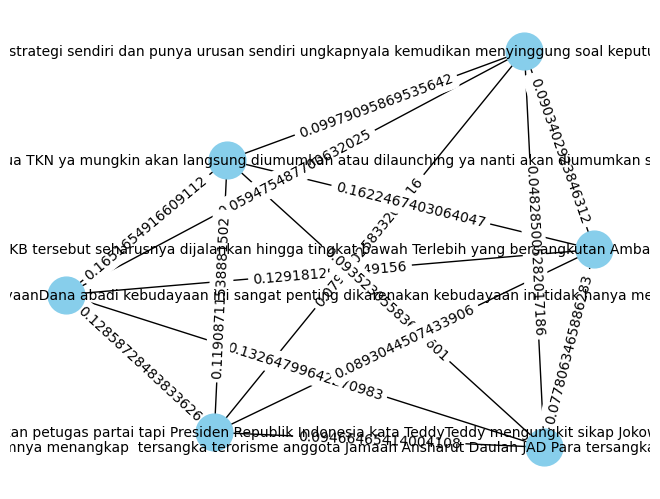

In [ ]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])
df

,Node,Closeness Centrality
0,Juru bicara PPP Achmad Baidowi Awiek merespons...,13.258660
1,Densus Antiteror Polri mengatakan tindak pida...,11.847231
2,Partai Garuda menyebut banyak fitnah yang ditu...,9.787345
3,Ambar Purwoko dipecat dari jabatan Ketua Dewan...,9.109474
4,Relawan Komite Independen Pemenangan KIP Prabo...,8.557673
5,Ketua Harian DPP Partai Gerindra Dasco mengata...,7.887501
